In [1]:
import numpy as np
import pandas as pd
import os
import networkx as nx
import random
import mutation
import crossover
import generator
import fitness
import plotting
import mainloop
#import pareto
import csv
from datetime import datetime
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

## 1. Parameters setting

In [2]:
# user given constants
src=0
dst=1
bandwidth_threshold = 2
# parameters
generation = 1000
max_depth = 5
k_shortest = 5
random_walk_mult = 2
generator_n = 10000
generator_p = 0.1

In [3]:
random.seed(datetime.now())

## 2. Read input

In [4]:
#Read file related to testing
def get_test_file():
    '''Generator that return string of file name'''
    import re
    for files in os.listdir():
        if re.match('test.+\.csv', files) is not None:
            yield files
            
def csv_to_np(filename):
    return pd.read_csv(filename, header=None, delim_whitespace=True).values

# Use generator if file does not exist
generated_filename = 'generated' + str(generator_n) + ' ' + str(generator_p) + '.csv'
try:
    bandwidth_matrix = csv_to_np(generated_filename)
except:
    print('Generating new bandwidth matrix!!!!!!!!!!!')
    bandwidth_matrix = generator.generate("random", (1, 100), n=generator_n, p=generator_p).out(type="2d_list")
    with open(generated_filename, 'w') as my_csv:
        csvWriter = csv.writer(my_csv,delimiter=' ')
        csvWriter.writerows(bandwidth_matrix)
else:
    print('Using existing generated matrix')

#bandwidth_matrix = csv_to_np('test1.csv')
#print(type(bandwidth_matrix), '\n', bandwidth_matrix)

Using existing generated matrix


In [5]:
def np_to_nx(bandwidth_matrix):
    # build neighbor matrix
    neighbor_matrix = []
    for row, _ in enumerate(bandwidth_matrix):
        neighbor_matrix.append(np.where(bandwidth_matrix[row] > 0)[0])
    neighbor_matrix = np.array(neighbor_matrix)
    
    # build the list of edges
    edges = np.array(np.where(bandwidth_matrix > 0)).transpose()

    # build nx Graph instance
    G = nx.Graph()
    num_of_nodes = bandwidth_matrix.shape[0]
    G.add_nodes_from(range(num_of_nodes))
    G.add_edges_from(edges)
    return G, neighbor_matrix
    
G, neighbor_matrix = np_to_nx(bandwidth_matrix)

/home/phua/anaconda3/envs/evo/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


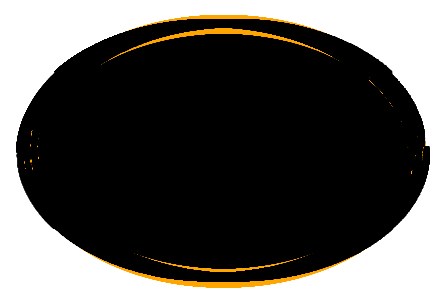

In [6]:
def nx_visualize(G):
    # Visualize the graph
    %matplotlib inline
    nx.draw_shell(G, with_labels=True, node_color='orange')

nx_visualize(G)

## 3. Initialization 

In [7]:
def random_walk(src, dest, min_step, neighbor_matrix):
    path=[src]
    #for i in range(step):
    while(True):
        next_node = random.choice(neighbor_matrix[path[-1]])
        path.append(next_node)
        
        if len(path) > min_step and path[-1] == dest:
            break
    return crossover.check_cycle(path)

In [8]:
def get_path_length(pop):
    # count path length of each individual
    path_length = []
    for ind in pop:
        path_length.append(len(ind))
    return path_length

In [9]:
def initial(G, s, d, iddfs_depth, population_size, neighbor_matrix):
    population = []
    for i in range(population_size):
        new_ind = random_walk(s, d, random_walk_mult * G.order(), neighbor_matrix)
        population.append(new_ind)
    return population

In [10]:
# Edge density of graph
# This is for calculating parameter (但現在還沒做)
edge_density = G.size()*2/G.order()*(G.order()-1)
print(edge_density)

10005189.381000001


## Experiments

--------------------------------------------------
population_size:  10
Path length for each initial individual: [159, 200, 154, 219, 132, 140, 33, 107, 181, 156]
   fitness                individual  hop
0   438431        [0, 3056, 4515, 1]    4
1   240751         [0, 286, 9837, 1]    4
2   232800         [0, 286, 6266, 1]    4
3   163413              [0, 4515, 1]    3
4   162972  [0, 4787, 2114, 6110, 1]    5


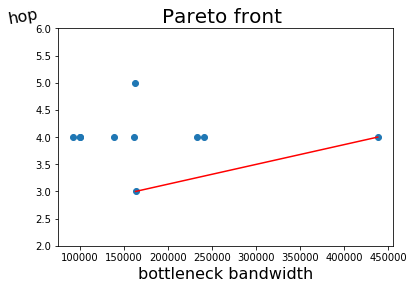

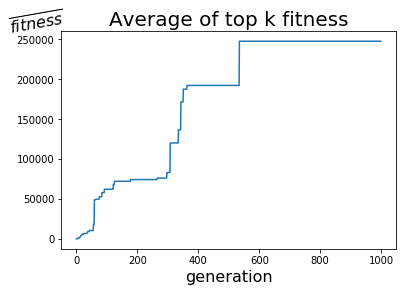

--------------------------------------------------
population_size:  20
Path length for each initial individual: [115, 172, 5, 90, 246, 88, 130, 133, 137, 129, 116, 86, 89, 82, 285, 188, 235, 87, 221, 61]
   fitness                individual  hop
0   297377  [0, 1437, 5733, 8704, 1]    5
1   297377  [0, 1611, 5733, 8704, 1]    5
2   297377   [0, 7405, 203, 8704, 1]    5
3   283761    [0, 7405, 203, 927, 1]    5
4   277317    [0, 8826, 203, 927, 1]    5


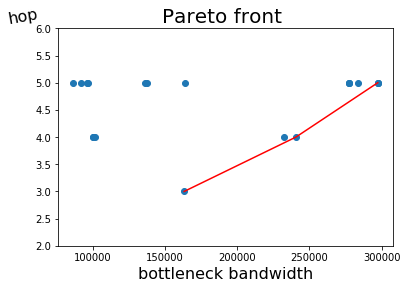

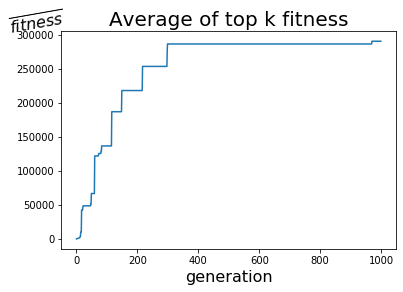

--------------------------------------------------
population_size:  50
Path length for each initial individual: [124, 172, 172, 207, 122, 68, 48, 103, 36, 64, 95, 206, 206, 311, 91, 72, 206, 83, 58, 43, 163, 65, 97, 119, 25, 59, 216, 223, 81, 272, 29, 169, 85, 188, 115, 97, 176, 130, 144, 182, 73, 66, 126, 90, 165, 134, 80, 259, 99, 159]
   fitness          individual  hop
0   786313  [0, 8601, 5679, 1]    4
1   519203  [0, 6138, 1462, 1]    4
2   511236  [0, 7400, 6897, 1]    4
3   438431  [0, 3056, 4515, 1]    4
4   392444  [0, 2226, 6599, 1]    4


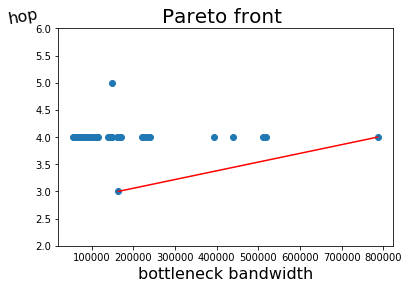

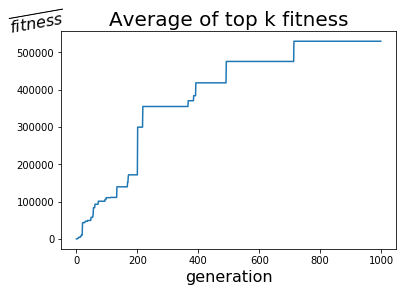

--------------------------------------------------
population_size:  100
Path length for each initial individual: [109, 34, 138, 137, 236, 86, 190, 76, 118, 104, 94, 102, 185, 170, 17, 151, 160, 43, 91, 141, 73, 264, 19, 257, 120, 16, 160, 46, 97, 37, 138, 189, 130, 307, 66, 42, 69, 171, 125, 178, 132, 235, 50, 220, 44, 199, 203, 70, 102, 114, 82, 51, 110, 117, 143, 118, 120, 87, 104, 186, 142, 62, 123, 86, 310, 122, 154, 147, 123, 119, 156, 54, 84, 159, 187, 199, 136, 135, 162, 217, 121, 136, 74, 32, 39, 84, 22, 210, 135, 149, 147, 177, 50, 80, 123, 113, 148, 126, 162, 250]
   fitness          individual  hop
0   786313  [0, 8601, 5679, 1]    4
1   519203  [0, 6138, 1462, 1]    4
2   511236  [0, 7400, 6897, 1]    4
3   438431  [0, 3056, 4515, 1]    4
4   392444  [0, 2226, 6599, 1]    4


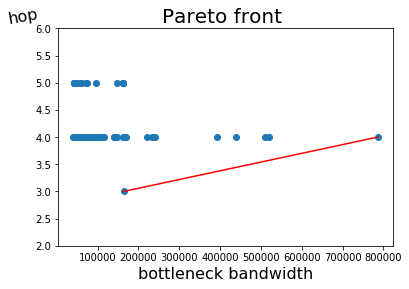

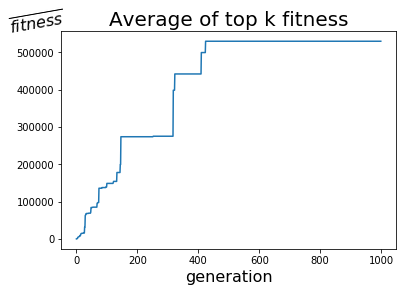

--------------------------------------------------
population_size:  150
Path length for each initial individual: [132, 178, 112, 72, 209, 48, 140, 338, 68, 152, 56, 65, 241, 129, 66, 159, 204, 85, 79, 150, 90, 158, 163, 176, 140, 135, 101, 170, 121, 135, 302, 138, 68, 211, 123, 169, 177, 195, 148, 37, 64, 162, 32, 115, 137, 209, 162, 283, 251, 92, 48, 20, 115, 60, 60, 136, 48, 188, 46, 143, 147, 181, 24, 126, 108, 64, 125, 109, 63, 73, 171, 107, 71, 85, 125, 127, 180, 59, 102, 136, 148, 113, 91, 86, 79, 120, 53, 133, 90, 41, 65, 52, 136, 122, 157, 164, 57, 87, 232, 141, 188, 147, 47, 71, 31, 109, 51, 42, 53, 150, 117, 100, 184, 140, 141, 121, 219, 119, 151, 103, 88, 158, 132, 48, 297, 124, 172, 74, 164, 166, 84, 102, 191, 181, 101, 146, 68, 206, 92, 165, 21, 150, 174, 97, 78, 94, 40, 179, 278, 79]
   fitness          individual  hop
0   786313  [0, 8601, 5679, 1]    4
1   519203  [0, 6138, 1462, 1]    4
2   511236  [0, 7400, 6897, 1]    4
3   438431  [0, 3056, 4515, 1]    4
4   392444

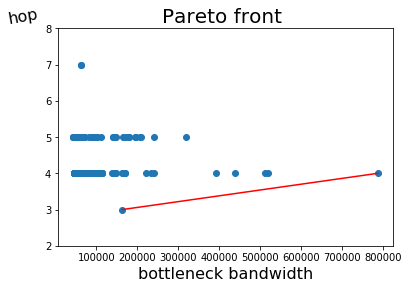

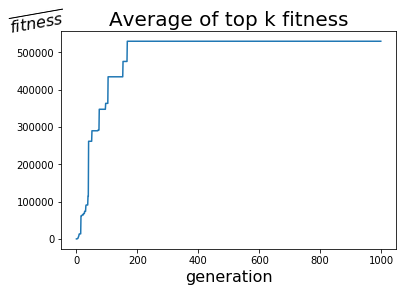

--------------------------------------------------
population_size:  200
Path length for each initial individual: [112, 50, 237, 235, 129, 213, 96, 102, 47, 81, 106, 177, 260, 46, 123, 87, 195, 255, 35, 133, 234, 152, 165, 195, 67, 62, 79, 175, 175, 92, 208, 98, 30, 22, 326, 173, 142, 305, 27, 22, 84, 37, 84, 74, 129, 60, 100, 52, 80, 101, 262, 54, 46, 185, 74, 154, 108, 194, 71, 32, 44, 45, 130, 87, 44, 133, 92, 136, 147, 51, 190, 87, 139, 93, 111, 229, 90, 67, 60, 110, 170, 71, 74, 72, 110, 160, 111, 116, 25, 101, 87, 22, 67, 192, 96, 20, 140, 215, 273, 30, 87, 86, 55, 197, 319, 156, 66, 128, 71, 307, 149, 18, 180, 31, 77, 222, 155, 242, 21, 73, 81, 167, 181, 111, 25, 166, 59, 117, 105, 108, 236, 29, 73, 145, 256, 44, 53, 103, 39, 87, 167, 110, 84, 140, 126, 216, 30, 145, 116, 230, 193, 102, 140, 151, 116, 175, 93, 53, 92, 96, 157, 68, 41, 91, 89, 277, 196, 210, 249, 138, 151, 112, 191, 201, 64, 78, 220, 63, 144, 66, 253, 79, 120, 188, 87, 104, 86, 177, 77, 85, 54, 153, 128, 93, 77, 

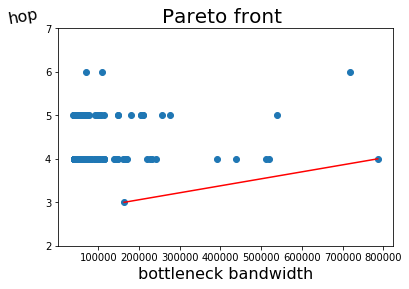

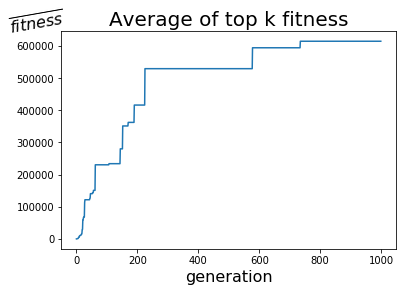

In [11]:
#candidate = np.linspace(0.1,0.2, num=2)
candidate = [10, 20, 50, 100, 150, 200]
#candidate = [50]
fitness_for_plot = []
popsize_for_plot = []

for c in candidate:
    #population_size = min(200, max(int(ratio * edge_density), k_shortest))
    population_size = min(200,  max(c, k_shortest))
    popsize_for_plot.append(population_size)
    # for example, given src=0, dst=3, max_depth=7, population_size=20
    pop = initial(G, src, dst, max_depth, population_size, neighbor_matrix)
    print('-'*50)
    print('population_size: ', population_size)
    print('Path length for each initial individual:', get_path_length(pop))
    
    # mainloop
    pop, fit_v_gen = mainloop.mainloop(generation, pop, bandwidth_matrix, neighbor_matrix, k_shortest, population_size)
    fitness_for_plot.append(fit_v_gen)
    
    # bandwidth(fitness) & path length(hops) evalutaion
    pop_with_fit = fitness.population_with_fitness(pop, bandwidth_matrix)
    rst = pd.DataFrame(sorted(pop_with_fit, key=lambda ind: ind['fitness'], reverse=True))
    rst['hop'] = get_path_length(pop)
    rst.head(k_shortest)
    
    print("="*30)
    print(rst.head(k_shortest))
    print("="*30)
    
    # plot pareto front
    data = rst.drop(columns='individual').values
    pareto_front = plotting.plot_pareto(data, savefig=True)
    
    # plot fitness vs. generation
    plotting.plot_fitness_vs_generation(fit_v_gen, savefig=True)


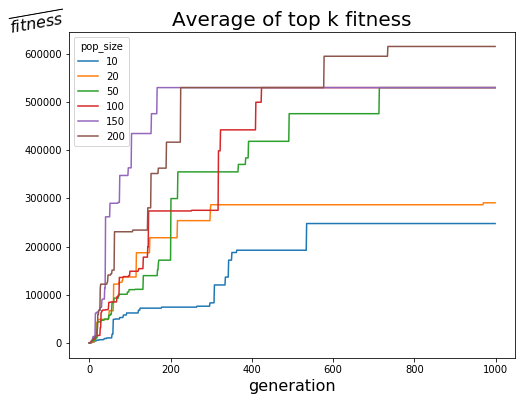

In [12]:
fig = plt.figure(figsize=(8, 6))
for idx, _ in enumerate(fitness_for_plot):
    
    plt.title("Average of top k fitness", fontsize=20)
    plt.xlabel('generation', fontsize=16)
    plt.ylabel('$\overline{fitness}$', fontsize=16, rotation=10)
    ax = plt.gca()
    ax.yaxis.set_label_coords(-0.07,1)
    plt.plot(fitness_for_plot[idx])
    plt.legend(title='pop_size',labels=popsize_for_plot,  loc='best')
    
plt.show()
# savefig
fig.savefig('./plots/experiments_'+datetime.now().strftime("%m%d_%H%M")+'.png') 

In [13]:
pd.DataFrame(fitness_for_plot)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,2.0,3.0,10.2,120.0,238.6,1208.4,1263.4,1263.4,1297.6,1323.0,...,247673.4,247673.4,247673.4,247673.4,247673.4,247673.4,247673.4,247673.4,247673.4,247673.4
1,154.2,317.6,367.6,472.6,748.0,1040.8,1133.0,1133.0,1417.8,1434.6,...,290641.8,290641.8,290641.8,290641.8,290641.8,290641.8,290641.8,290641.8,290641.8,290641.8
2,56.8,194.0,428.0,656.6,713.6,1561.0,1973.4,4019.6,4130.8,4172.4,...,529525.4,529525.4,529525.4,529525.4,529525.4,529525.4,529525.4,529525.4,529525.4,529525.4
3,78.2,278.6,468.2,1957.0,2067.0,4648.6,5136.8,5959.0,6354.4,6381.8,...,529525.4,529525.4,529525.4,529525.4,529525.4,529525.4,529525.4,529525.4,529525.4,529525.4
4,80.4,131.6,166.0,967.0,1108.0,1766.8,3697.6,6329.6,8706.8,13002.8,...,529525.4,529525.4,529525.4,529525.4,529525.4,529525.4,529525.4,529525.4,529525.4,529525.4
5,129.4,396.2,536.0,629.2,1006.0,1279.4,2273.6,4869.8,5282.6,5282.6,...,614827.8,614827.8,614827.8,614827.8,614827.8,614827.8,614827.8,614827.8,614827.8,614827.8


## Plot bandwidth distribution
$F(1,1)$: F-distribution with df1 = df2 = 1

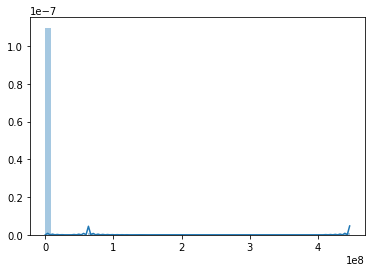

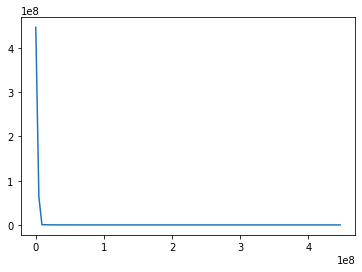

In [14]:
import seaborn as sns

fig = plt.figure(figsize=(6,4))
y = np.random.f(1, 1, 100) * 1000 + 1 
y = -np.sort(-y)
x = np.linspace(0, max(y), 100)

sns.distplot(y)
plt.show()

plt.plot(x,y)

plt.show()

## Exhausitve search (BFS)

In [15]:
"""
all_path_generator = nx.all_simple_paths(G, src, dst)
max_bandwidth_path = pd.DataFrame(pop_with_fit).tail(k_shortest).values
current_max_bandwidth = min(max_bandwidth_path[:,0])

for p in all_path_generator:
    current_bandwidth = fitness.fitness(p, bandwidth_matrix) 
    if current_bandwidth > current_max_bandwidth:
        # create new pair of bandwidth & path
        temp = max_bandwidth_path[0].copy()
        temp[0] = current_bandwidth
        temp[1] = p
        # append to table with size k_shortest 
        max_bandwidth_path = np.append(max_bandwidth_path, [temp] , axis=0)
        if len(max_bandwidth_path) > k_shortest:
            max_bandwidth_path.sort(axis=0)
            max_bandwidth_path = max_bandwidth_path[0:-1]
        current_max_bandwidth = min(max_bandwidth_path[:,0])
        
print(max_bandwidth_path)
"""

'\nall_path_generator = nx.all_simple_paths(G, src, dst)\nmax_bandwidth_path = pd.DataFrame(pop_with_fit).tail(k_shortest).values\ncurrent_max_bandwidth = min(max_bandwidth_path[:,0])\n\nfor p in all_path_generator:\n    current_bandwidth = fitness.fitness(p, bandwidth_matrix) \n    if current_bandwidth > current_max_bandwidth:\n        # create new pair of bandwidth & path\n        temp = max_bandwidth_path[0].copy()\n        temp[0] = current_bandwidth\n        temp[1] = p\n        # append to table with size k_shortest \n        max_bandwidth_path = np.append(max_bandwidth_path, [temp] , axis=0)\n        if len(max_bandwidth_path) > k_shortest:\n            max_bandwidth_path.sort(axis=0)\n            max_bandwidth_path = max_bandwidth_path[0:-1]\n        current_max_bandwidth = min(max_bandwidth_path[:,0])\n        \nprint(max_bandwidth_path)\n'

In [16]:
"""
max_bandwidth_path = pd.DataFrame(max_bandwidth_path, columns=['fitness', 'individual'])
# path length(hops) evaluation
max_bandwidth_path['hop'] = get_path_length(max_bandwidth_path['individual'].values)
max_bandwidth_path
"""

"\nmax_bandwidth_path = pd.DataFrame(max_bandwidth_path, columns=['fitness', 'individual'])\n# path length(hops) evaluation\nmax_bandwidth_path['hop'] = get_path_length(max_bandwidth_path['individual'].values)\nmax_bandwidth_path\n"